In [1]:
import os
import ee
import geemap
from IPython.display import display, clear_output, Image
from geemap import cartoee
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

In [2]:
# After executing this line of code for the first use, you can get the authentication number linked to Google.
#Map = geemap.Map()
# Authenticate the Google earth engine with google account
ee.Initialize() 
Map = geemap.Map()

In [3]:
dataset = ee.ImageCollection('MODIS/MCD43A4_006_NDVI') \
                  .filter(ee.Filter.date('2021-01-01', '2021-12-31')) \
                  .select('NDVI') \
                  .mean()
    
colorizedVis = {
  #'bands': ['NDVI'],
  'min': 0.0,
  'max': 1.0,
  'palette': [
    'FFFFFF', 'CE7E45', 'DF923D', 'F1B555', 'FCD163', '99B718', '74A901',
    '66A000', '529400', '3E8601', '207401', '056201', '004C00', '023B01',
    '012E01', '011D01', '011301'
  ]
}
box = [-180,-88,180,88]

ndvi = dataset.visualize(**colorizedVis)

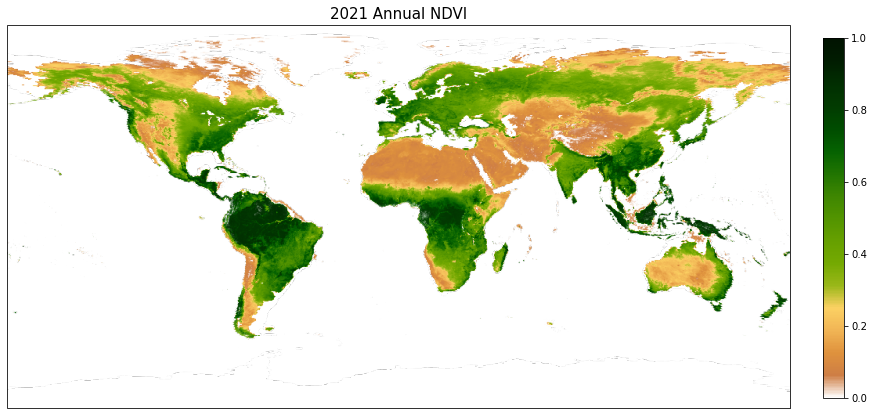

In [5]:
fig = plt.figure(figsize=(15, 10))

# plot the result with cartoee using a PlateCarre projection (default)
ax = cartoee.get_map(ndvi, region = box)
cb = cartoee.add_colorbar(ax, vis_params=colorizedVis, loc='right',label=None)

ax.set_title(label='2021 Annual NDVI', fontsize=15)

# ax.coastlines()
plt.savefig(r"C:\Users\Yang Hsiu\Desktop\plot\2021 Annual NDVI.tif", dpi=200)